In [2]:
import pickle
import os
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from statsmodels.tsa.stattools import acf
import multiprocessing as mp
# from utils import *
from web3 import Web3
# from eth_defi.provider.multi_provider import create_multi_provider_web3
# from bootstrap_autocorr_cython import bootstrap_dependent_autocorr, bootstrap_iid_autocorr, autocorr
# from sandwich_attacks import *
from scipy.stats import gaussian_kde
sns.set_theme()

# Base font size for ticks
base_fontsize = 6
# Calculate font sizes for labels and title
label_fontsize = base_fontsize * 1.16
title_fontsize = base_fontsize * 1.16
# Update Matplotlib rcParams
plt.rcParams.update({
    "font.size": 2*base_fontsize,           # Set default font size for text
    "xtick.labelsize": 2*base_fontsize,      # Set font size for x-tick labels
    "ytick.labelsize": 2*base_fontsize,      # Set font size for y-tick labels
    "axes.labelsize": 2*label_fontsize,      # Set font size for x and y labels
    "axes.titlesize": 2*title_fontsize,       # Set font size for the title
    'legend.fontsize': 2*base_fontsize        # Set font size for the legend
})

json_rpc_url = (
            "https://eth.llamarpc.com/sk_llama_252714c1e64c9873e3b21ff94d7f1a3f "
            "https://mainnet.infura.io/v3/5f38fb376e0548c8a828112252a6a588 "
            "https://eth-mainnet.g.alchemy.com/v2/eq9r2pPrnkczHi1MuJmXPMAc3nn3kc4F "
            "https://snowy-broken-spring.quiknode.pro/e1c35cbb709b1cb095d49e42dcd4d40e6cbbfd7a"
            "https://eth.rpc.grove.city/v1/887ffda2"
            "https://lb.nodies.app/v1/c6a2e72646e34fc78d95513a52c4aca6"
        )
# web3 = create_multi_provider_web3(json_rpc_url)

In [2]:
all_events = pd.read_parquet('data/ethereum/USDC_WETH_events_with_gas_used.parquet')
pools_to_keep = ['0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640', '0xe0554a476a092703abdb3ef35c80e0d76d32939f', '0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8']
all_events = all_events[all_events['pool_address'].isin(pools_to_keep)]
all_events = all_events.drop_duplicates()
all_events

FileNotFoundError: [Errno 2] No such file or directory: 'data/ethereum/USDC_WETH_events_with_gas_used.parquet'

In [ ]:
token0, token1 = 'USDC', 'WETH'

with open(f'data/ethereum/{token0.lower()}_{token1.lower()}/jit_transactions.pkl', 'rb') as f:
    jit_transactions = pickle.load(f)

file_name = 'sandwich_attacks_tmp_optimized'
sandwich_attacks  = pd.read_pickle(f'data/ethereum/{token0.lower()}_{token1.lower()}/{file_name}.pkl')
sandwich_attacks['pattern_type'] = sandwich_attacks['pattern_type'].apply(lambda x: x[0]) 

jit_transactions = jit_transactions.reset_index(drop=True)
sandwich_attacks = sandwich_attacks.reset_index(drop=True)

display(sandwich_attacks)
display(jit_transactions)

,block_number,pool_address,count,front_run_swapped_amount,mint_amounts,mint_ticks,victim_swapped_amount,burn_amounts,burn_ticks,back_run_swapped_amount,hashes,origin,pattern_type,gas_used
0,16307934,0xe0554a476a092703abdb3ef35c80e0d76d32939f,1,"[[565650.290176, -466.79325607727077]]",[None],[None],"[[[5496.292328, -4.463050717015064]]]",[None],[None],"[[-565702.83432, 466.79325607727077]]",[[0xfbe5b3a9465dce533f721396c779a93ae3b3097dc4...,[0xeea07edef8fc5b4a42beffac4808eac543b62b28],C,"[[406834.0, [256678.0], 414429.0]]"
1,16307973,0xe0554a476a092703abdb3ef35c80e0d76d32939f,1,"[[-119097.344644, 99.90999996796764]]",[None],[None],"[[[-10099.485141, 8.500372040251317]]]",[None],[None],"[[119097.344608, -99.9415503012379]]",[[0x540a48f4a25b941d2b9468f478931a2c3c082442ea...,[0x41d3ab85aafed2ef9e644cb7d3bbca2fc4d8cac8],C,"[[110857.0, [417690.0], 112745.0]]"
2,16308078,0xe0554a476a092703abdb3ef35c80e0d76d32939f,1,"[[-211024.953753, 177.47672262624326]]",[None],[None],"[[[-5912.284172, 5.0]]]",[None],[None],"[[211024.953752, -177.49493951138012]]",[[0xcb45fb077927f67e20745af626ad2d152ff7231547...,[0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b],C,"[[108362.0, [354604.0], 110114.0]]"
3,16308191,0xe0554a476a092703abdb3ef35c80e0d76d32939f,1,"[[-393153.741363, 332.1617606608538]]",[None],[None],"[[[-6610.394758, 5.642356349055248]]]",[None],[None],"[[393153.741362, -332.2081177054841]]",[[0x155fd4919a33a9b41480ceed4a3a68eaa43b6608eb...,[0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b],C,"[[167129.0, [694903.0], 168095.0]]"
4,16308279,0xe0554a476a092703abdb3ef35c80e0d76d32939f,1,"[[1445859.25262, -1155.2739639356719]]",[None],[None],"[[[4372.071908, -3.292973367087483]]]",[None],[None],"[[-1446013.78519, 1155.2739639356719]]",[[0x369db6d0a6cfa0e509eefe5f8378e4947f1365e0f0...,[0x654fae4aa229d104cabead47e56703f58b174be4],C,"[[1591926.0, [326644.0], 1499095.0]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36256,21525410,0xe0554a476a092703abdb3ef35c80e0d76d32939f,1,"[[93173.522558, -27.25696582033447]]",[None],[None],"[[[3301.189066, -0.960648684970079]]]",[None],[None],"[[-395614.253979, 117.1208175260407]]",[[0xd512dadcb96a3d4d1a12b87243fca268f8f76bc78e...,[0xae2fc483527b8ef99eb5d9b44875f005ba1fae13],C,"[[nan, [nan], nan]]"
36257,21525503,0xe0554a476a092703abdb3ef35c80e0d76d32939f,1,"[[-147425.779241, 44.54842243890545]]",[None],[None],"[[[-7592.029136, 2.321612080965749]]]",[None],[None],"[[147425.771838, -44.58559782468872]]",[[0x9d64f8b096b1dd47b479a077acfc2d1644db2f2082...,[0xae2fc483527b8ef99eb5d9b44875f005ba1fae13],C,"[[nan, [nan], nan]]"
36258,21525525,0xe0554a476a092703abdb3ef35c80e0d76d32939f,1,"[[-48377.950824, 14.532963375861728]]",[None],[None],"[[[-4080.0, 1.2292090606043706]]]",[None],[None],"[[79231.942208, -23.775937295563097]]",[[0x41087e46bc3680b4073282121745c420571e930a49...,[0xae2fc483527b8ef99eb5d9b44875f005ba1fae13],C,"[[nan, [nan], nan]]"
36259,21525543,0xe0554a476a092703abdb3ef35c80e0d76d32939f,1,"[[206847.508432, -61.576375201339275]]",[None],[None],"[[[13598.64, -4.0205002589024215]]]",[None],[None],"[[-206980.324463, 61.576374101827646]]",[[0x309436fb991d87a5a9bb7b70054e9a92934382c953...,[0xae2fc483527b8ef99eb5d9b44875f005ba1fae13],C,"[[nan, [nan], nan]]"


,block_number,Mint Range,Mint Amount,Swap Tick,Swap Amount,Liquidity,Sqrt Price,Burn Amount,Tx Hash,Origin,Pool Address,Gas Used
0,16307990,"[205450, 205460]",9.840420e+20,[205459],"[[-54954.672508, 46.0]]",[[39973927355692200668]],[[2291648071660068321612369810229369]],9.840420e+20,[[0x2f2842bd2ec9bba4d729952b213a3fbea80e6c4fc1...,0xa5a13f62ce1113838e0d9b4559b8caf5f76463c0,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,"[[505304.0, 121362.0, 250964.0]]"
1,16308081,"[205450, 205460]",2.275188e+21,[205453],"[[-16663.577445, 13.94072125]]",[[39974044219133730316]],[[2291023414460527512234160532292719]],2.275188e+21,[[0x6f73cb19b2dd735b4d440cdad2d5646b469bf36f6d...,0x0039b625b1d8632c7a0057c964ec58a9f39789d3,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,"[[439975.0, 129889.0, 236326.0]]"
2,16308118,"[205450, 205460]",2.316459e+21,[205453],"[[-52874.339536, 44.235]]",[[39974102952496085424]],[[2291034672703441106992496225325141]],2.316459e+21,[[0xb64af7d532a3a9685452bb01506069ff279ddf8689...,0x60b86af869f23aeb552fb7f3cabd11b829f6ab2f,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,"[[508340.0, 131058.0, 250955.0]]"
3,16308196,"[205450, 205460]",1.397521e+21,[205456],"[[-59438.55115, 49.74]]",[[39974582212968359597]],[[2291342580471075253351994683067231]],1.397521e+21,[[0xd206569ae3c6d66f294304fd1e8391731febc20b4c...,0x065e3dbafcb2c26a978720f9eb4bce6ad9d644a1,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,"[[514483.0, 121338.0, 250955.0]]"
4,16308206,"[205450, 205460]",2.049356e+21,[205459],"[[-119469.009116, 100.0]]",[[39974582212968359597]],[[2291625843433465199494127987375825]],2.049356e+21,[[0xf635ce83612bb2fb5d36c8ac2a204f7450e2d33b16...,0x479bc00624e58398f4cf59d78884d12fb515790a,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,"[[439953.0, 121324.0, 236308.0]]"
...,...,...,...,...,...,...,...,...,...,...,...,...
28702,21524929,"[195170, 195190]",1.791130e+19,[195181],"[[-39207.775, 11.74261237669706]]",[[]],[[1370796764675603423951483387545395]],1.791130e+19,[[0x31bf84bc388c4513f567a976cfd2e151830c7d41ae...,0xd1fa51f2db23a9fa9d7bb8437b89fb2e70c60cb7,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,"[[nan, nan, nan]]"
28703,21525010,"[195378, 195379]",2.998575e+21,[195378],"[[-17056.536271, 5.208427105512327]]",[[]],[[1384413302362429188856757568213100]],2.998575e+21,[[0x11528587d5d2b2be292612bed650e83d45736ac080...,0xae2fc483527b8ef99eb5d9b44875f005ba1fae13,0xe0554a476a092703abdb3ef35c80e0d76d32939f,"[[nan, nan, nan]]"
28704,21525020,"[195375, 195376]",8.598487e+20,[195375],"[[-14514.258614, 4.430579870007411]]",[[]],[[1384174322322801471293395531175301]],8.598487e+20,[[0xd3286f2a42b5dadb5f6866785190603909ddeba8f8...,0xae2fc483527b8ef99eb5d9b44875f005ba1fae13,0xe0554a476a092703abdb3ef35c80e0d76d32939f,"[[nan, nan, nan]]"
28705,21525066,"[195200, 195210]",8.626094e+20,[195203],"[[-82352.821998, 24.720120698385525]]",[[]],[[1372326309785210474258843059000224]],8.626094e+20,[[0x78e1c317c85d232a2bb2c57bad22a4f02e86ac6c0c...,0x92d6c5cb3b6148fde44d0d7295dbecb8dae40ef2,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,"[[nan, nan, nan]]"


%matplotlib widget
import numpy as np
import math
import matplotlib.pyplot as plt

# ------------------ Parameters ------------------
x0 = 1.0
f = 0.0005          # fee tier
r = 1.0 - f
gamma = 0.01       # victim slippage tolerance for sandwich
sigma_max = 0.011   # domain for victim size σ
n_sigma = 600
n_eps = 1200       # resolution for epsilon grid when maximizing sandwich profit

sigmas = np.linspace(1e-6, sigma_max, n_sigma)

# ------------------ Closed-form helpers ------------------
def pi_br_star(sigma, r):
    """Normalized optimal back-run profit Π*_br / x0 from Eq. (15) (v3-corrected)."""
    u = 1.0 + r * sigma
    return ((math.sqrt(r) * u - 1.0) ** 2) / (r * u)

def eps_max(sigma, gamma, r):
    """ε_max(σ,γ,r) slippage ceiling (v3-corrected)."""
    root = math.sqrt((r*r)*(sigma*sigma) + 4.0*(1.0 + r*sigma)/(1.0 - gamma))
    return max(0.0, ((-r*sigma + root)/2.0 - 1.0) / r)

def pi_sand_at_eps(eps, sigma, r):
    """Sandwich profit π(ε;σ,r) normalized by x0 (v3-corrected)."""
    t = 1.0 + r*eps
    q = 1.0 + r*(eps + sigma)
    numer = (r*r)*eps*(q*q)
    denom = t + (r*r)*eps*q
    return numer/denom - eps

def pi_sand_star(sigma, r, gamma, n_eps=1200):
    """Max π subject to 0 <= ε <= ε_max; grid search (robust + sufficient for plotting)."""
    emax = eps_max(sigma, gamma, r)
    if emax <= 0:
        return 0.0, 0.0
    eps_grid = np.linspace(0.0, emax, n_eps)
    pis = np.array([pi_sand_at_eps(e, sigma, r) for e in eps_grid])
    idx = np.argmax(pis)
    return float(pis[idx]), float(eps_grid[idx])

# ------------------ Curves ------------------
jit = f * sigmas  # Eq. (6): m_JIT/x0 = σ f (gas set to zero for this comparison)
br = np.array([pi_br_star(s, r) for s in sigmas])

sand = np.zeros_like(sigmas)
eps_star = np.zeros_like(sigmas)
for i, s in enumerate(sigmas):
    sand[i], eps_star[i] = pi_sand_star(s, r, gamma, n_eps=n_eps)

# Back-run activation threshold (Δy_br* > 0) ~ f/2 for small f
sigma_br_min = (1.0 / math.sqrt(r) - 1.0) / r

# ------------------ Plot ------------------
plt.figure()
plt.plot(sigmas, jit, label="JIT (σ·f)")
plt.plot(sigmas, br, label="Back-run $\Pi_{br}^*$")
plt.plot(sigmas, sand, label=f"Sandwich $\pi^*$ (γ={gamma})")
plt.axvline(sigma_br_min, linestyle="--", linewidth=1.0, label=r"$\sigma_{\min}^{br}$")
plt.xlabel("σ (victim size as fraction of x₀)")
plt.ylabel("Normalized profit per x₀")
plt.title(f"JIT vs Back-run vs Sandwich (f={f:.4f}, r={r:.4f}, γ={gamma})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"images/profits_{f}.pdf", bbox_inches='tight', dpi=300)
plt.show()


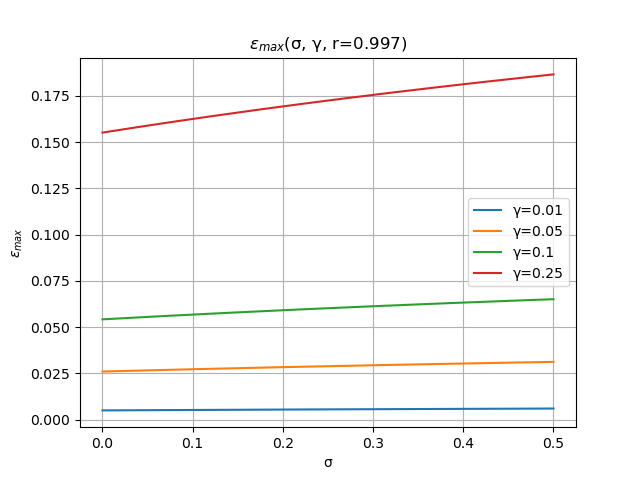

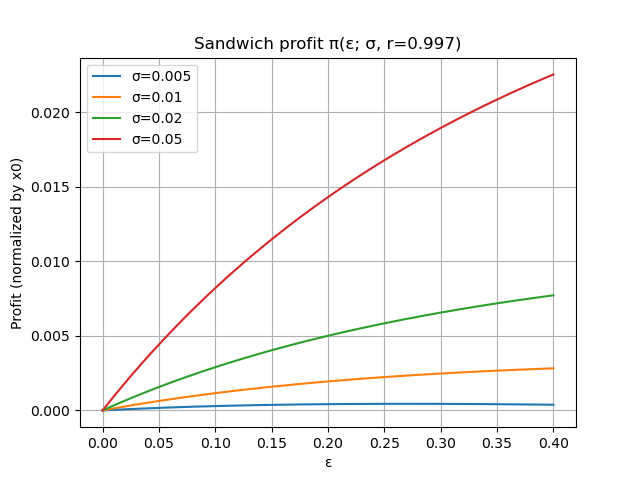

In [7]:
# Verification of Uniswap v3 Section 3 identities
%matplotlib widget
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# === Core v3 swap primitives ===

def x_to_y(x, y, s_user, r):
    """
    X->Y swap in Uniswap v3 semantics.
    - s_user: user-submitted X amount (pre-fee)
    - r: 1 - fee
    Returns: x_plus, y_plus, dy_out, price_ratio = P_plus / P
    """
    eff = r * s_user
    x_plus = x + eff
    y_plus = (x * y) / (x + eff)  # constant product with fee-adjusted input
    dy_out = y - y_plus
    price_ratio = (y_plus / x_plus) / (y / x)
    return x_plus, y_plus, dy_out, price_ratio

def y_to_x(x, y, t_user, r):
    """
    Y->X swap in Uniswap v3 semantics.
    - t_user: user-submitted Y amount (pre-fee)
    - r: 1 - fee
    Returns: x_plus, y_plus, dx_out, price_ratio = P_plus / P
    """
    eff = r * t_user
    y_plus = y + eff
    x_plus = (x * y) / (y + eff)
    dx_out = x - x_plus
    price_ratio = (y_plus / x_plus) / (y / x)
    return x_plus, y_plus, dx_out, price_ratio


# === Identities from the derivation ===

def victim_only_identities(x0, y0, r, sigma):
    # Victim X->Y with S = sigma * x0
    S = sigma * x0
    x1, y1, dy_v, pr_v = x_to_y(x0, y0, S, r)
    
    # Closed forms
    x1_cf = x0 * (1 + r * sigma)
    y1_cf = y0 / (1 + r * sigma)
    dy_v_cf = y0 * (r * sigma) / (1 + r * sigma)
    pr_v_cf = 1.0 / (1.0 + r * sigma)**2
    
    return {
        "x1_err": abs(x1 - x1_cf),
        "y1_err": abs(y1 - y1_cf),
        "dy_v_err": abs(dy_v - dy_v_cf),
        "pr_v_err": abs(pr_v - pr_v_cf)
    }

def backrun_optimality(x0, y0, r, sigma):
    # Post victim state
    S = sigma * x0
    x1, y1, dy_v, pr_v = x_to_y(x0, y0, S, r)
    P0 = y0 / x0
    
    # Claimed optimal Y input (user-side)
    dy_star = (y0 / r) * (math.sqrt(r) - 1.0 / (1.0 + r * sigma))
    
    # FOC check via price reset: P2/P0 should equal r
    # Apply Y->X backrun with dy_star
    x2, y2, dx_br, pr_br = y_to_x(x1, y1, dy_star, r)
    # Combined price ratio
    pr_total = pr_v * pr_br  # P2/P0
    foc_price_err = abs(pr_total - r)
    
    # Profit check against closed form
    pi_star_sim = dx_br - dy_star / P0
    pi_star_cf = x0 * ((math.sqrt(r) * (1 + r * sigma) - 1)**2) / (r * (1 + r * sigma))
    
    return {
        "foc_price_err": abs(foc_price_err),
        "profit_err": abs(pi_star_sim - pi_star_cf),
        "dy_star_positive": float(dy_star > 0.0)
    }

def sandwich_blocks(x0, y0, r, sigma, eps):
    # Front-run
    sfr = eps * x0
    x1, y1, dy_fr, pr1 = x_to_y(x0, y0, sfr, r)
    # Victim on front-run state
    S = sigma * x0
    x2m, y2m, dy_v, pr2 = x_to_y(x1, y1, S, r)
    # Back-run with self-funded Y = dy_fr
    x3, y3, dx_br, pr3 = y_to_x(x2m, y2m, dy_fr, r)
    return (x1, y1, dy_fr, x2m, y2m, dy_v, x3, y3, dx_br, pr1 * pr2 * pr3)

def sandwich_identities(x0, y0, r, sigma, eps):
    # Simulate
    x1, y1, dy_fr, x2m, y2m, dy_v_sim, x3, y3, dx_br_sim, pr_total = sandwich_blocks(x0, y0, r, sigma, eps)
    
    # Closed forms
    dy_fr_cf = y0 * (r * eps) / (1 + r * eps)
    dy_v_cf = (y0 * r * sigma) / ((1 + r * eps) * (1 + r * eps + r * sigma))
    
    # Closed form backrun X-out
    numer = (r**2) * eps * (1 + r * eps + r * sigma)**2
    denom = (1 + r * eps) + (r**2) * eps * (1 + r * eps + r * sigma)
    dx_br_cf = x0 * numer / denom
    
    # Profit normalized
    pi_sim = dx_br_sim - eps * x0
    pi_cf = x0 * numer / denom - eps * x0
    
    return {
        "dy_fr_err": abs(dy_fr - dy_fr_cf),
        "dy_v_err": abs(dy_v_sim - dy_v_cf),
        "dx_br_err": abs(dx_br_sim - dx_br_cf),
        "pi_err": abs(pi_sim - pi_cf),
    }

def eps_max_closed_form(sigma, gamma, r):
    # ε_max(σ,γ,r) from the derivation
    root = math.sqrt((r**2) * (sigma**2) + 4.0 * (1.0 + r * sigma) / (1.0 - gamma))
    return ((-r * sigma + root) / 2.0 - 1.0) / r

def verify_slippage_bound(x0, y0, r, sigma, gamma, atol=1e-10, rtol=1e-9):
    eps_max = eps_max_closed_form(sigma, gamma, r)
    # Evaluate constraint at ε_max (should be tight):
    lhs = 1.0 / ((1 + r * eps_max) * (1 + r * eps_max + r * sigma))
    rhs = (1.0 - gamma) / (1.0 + r * sigma)
    return abs(lhs - rhs)

def small_sigma_onset(r):
    # σ_min^{sand} ≈ (1-r^2)/(2 r^3)
    return (1 - r**2) / (2 * r**3)

def numeric_sigma_onset(x0, y0, r, eps_small=1e-6):
    # Find σ where π(eps_small; σ, r) changes sign ~ 0, by scanning
    sigmas = np.linspace(1e-6, 0.05, 2000)
    vals = []
    for s in sigmas:
        ids = sandwich_identities(x0, y0, r, s, eps_small)
        # recover π from error-free closed form using our function to be robust
        numer = (r**2) * eps_small * (1 + r*eps_small + r*s)**2
        denom = (1 + r*eps_small) + (r**2) * eps_small * (1 + r*eps_small + r*s)
        pi = numer/denom - eps_small
        vals.append(pi)
    vals = np.array(vals)
    # first index where pi >= 0
    idx = np.argmax(vals >= 0.0)
    return sigmas[idx] if vals[idx] >= 0 else np.nan

# === Global randomized verification ===

rng = np.random.default_rng(42)

fees = [0.0005, 0.003, 0.01]  # Uniswap v3 fee tiers
tests = []

for f in fees:
    r = 1.0 - f
    for _ in range(200):
        # Random reserves (keep moderate conditioning)
        x0 = 1.0  # scale invariance allows this
        y0 = rng.uniform(0.5, 2.0)  # random price
        sigma = rng.uniform(1e-6, 0.2)
        eps = rng.uniform(1e-6, 0.2)
        gamma = rng.uniform(0.0, 0.5)
        
        # Victim-only identities
        vo = victim_only_identities(x0, y0, r, sigma)
        # Backrun optimality & profit
        bo = backrun_optimality(x0, y0, r, sigma)
        # Sandwich block equalities
        si = sandwich_identities(x0, y0, r, sigma, eps)
        # Slippage boundary tightness (use moderate gamma to avoid ill conditioning)
        sb_err = verify_slippage_bound(x0, y0, r, sigma, gamma)
        
        tests.append({
            "fee": f,
            "max_err_victim": max(vo.values()),
            "foc_price_err": bo["foc_price_err"],
            "profit_err": bo["profit_err"],
            "dy_star_positive": bo["dy_star_positive"],
            "max_err_sandwich": max(si.values()),
            "slippage_tight_err": sb_err
        })

df = pd.DataFrame(tests)

# Summaries
summary = df.groupby("fee").agg({
    "max_err_victim": ["max", "median"],
    "foc_price_err": ["max", "median"],
    "profit_err": ["max", "median"],
    "max_err_sandwich": ["max", "median"],
    "slippage_tight_err": ["max", "median"],
    "dy_star_positive": "mean"
}).reset_index()


# === Visual sanity plots ===

# 1) epsilon_max vs sigma for different gammas at fee 0.3% (r=0.997)
r_plot = 1.0 - 0.003
sigmas = np.linspace(1e-4, 0.5, 400)
gammas = [0.01, 0.05, 0.10, 0.25]

plt.figure()
for g in gammas:
    eps_max_vals = [eps_max_closed_form(s, g, r_plot) for s in sigmas]
    plt.plot(sigmas, eps_max_vals, label=f"γ={g}")
plt.xlabel("σ")
plt.ylabel(r"$ε_{{max}}$")
plt.title(r"$ε_{{max}}$(σ, γ, r=0.997)")
plt.legend()
plt.grid(True)
plt.savefig("images/epsilon_max_vs_slippage.pdf", bbox_inches='tight', dpi=300)
plt.show()

# 2) Profit vs epsilon at a few sigma values (illustrative, r=0.997)
plt.figure()
sigma_list = [0.005, 0.01, 0.02, 0.05]
eps_grid = np.linspace(1e-6, 0.4, 400)
for s in sigma_list:
    numer = (r_plot**2) * eps_grid * (1 + r_plot*eps_grid + r_plot*s)**2
    denom = (1 + r_plot*eps_grid) + (r_plot**2) * eps_grid * (1 + r_plot*eps_grid + r_plot*s)
    pi_vals = numer/denom - eps_grid
    plt.plot(eps_grid, pi_vals, label=f"σ={s}")
plt.xlabel("ε")
plt.ylabel("Profit (normalized by x0)")
plt.title("Sandwich profit π(ε; σ, r=0.997)")
plt.legend()
plt.grid(True)
plt.savefig("images/sandwich_profit_vs_epsilon.pdf", bbox_inches='tight', dpi=300)
plt.show()

# 3) Onset threshold check: numerical vs closed-form approximation
rows = []
for f in fees:
    r = 1.0 - f
    sig_num = numeric_sigma_onset(1.0, 1.0, r, eps_small=1e-6)
    sig_approx = small_sigma_onset(r)
    rows.append({"fee": f, "r": r, "sigma_onset_numeric": sig_num, "sigma_onset_approx": sig_approx, "abs_diff": abs(sig_num - sig_approx)})
df_onset = pd.DataFrame(rows)


